In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [245]:
sample_game_1_events = pd.read_csv('data/Sample_Game_1/Sample_Game_1_RawEventsData.csv')
sample_game_1_events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,Player19,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,1,0.04,3,0.12,Player19,Player21,0.45,0.39,0.55,0.43
2,Away,PASS,NaN,1,3,0.12,17,0.68,Player21,Player15,0.55,0.43,0.58,0.21
3,Away,PASS,NaN,1,45,1.80,61,2.44,Player15,Player19,0.55,0.19,0.45,0.31
4,Away,PASS,NaN,1,77,3.08,96,3.84,Player19,Player21,0.45,0.32,0.49,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,Home,PASS,NaN,2,143361,5734.44,143483,5739.32,Player12,Player13,0.60,0.33,0.19,0.95
1741,Home,PASS,NaN,2,143578,5743.12,143593,5743.72,Player13,Player4,0.09,0.88,0.14,0.69
1742,Home,BALL LOST,INTERCEPTION,2,143598,5743.92,143618,5744.72,Player4,NaN,0.13,0.69,0.07,0.61
1743,Away,RECOVERY,BLOCKED,2,143617,5744.68,143617,5744.68,Player16,NaN,0.05,0.62,NaN,NaN


In [246]:
sample_game_2_events = pd.read_csv('data/Sample_Game_2/Sample_Game_2_RawEventsData.csv')
sample_game_2_events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.50,0.50,0.40,0.51
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,0.43,0.50,0.44,0.22
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,0.47,0.19,0.31,0.28
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,0.29,0.32,0.26,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,0.54,0.77,0.29,0.24
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,0.31,0.30,NaN,NaN
1932,Away,CHALLENGE,AERIAL-LOST,2,140183,5607.32,140183,5607.32,Player24,NaN,0.32,0.30,NaN,NaN
1933,Home,RECOVERY,NaN,2,140211,5608.44,140211,5608.44,Player12,NaN,0.34,0.32,NaN,NaN


In [247]:
Typeevents_df = pd.DataFrame(sample_game_1_events['Type'].value_counts())
Typeevents_df

,count
Type,
PASS,799
RECOVERY,278
BALL LOST,257
CHALLENGE,233
SET PIECE,77
BALL OUT,51
SHOT,24
FAULT RECEIVED,22
CARD,4


In [248]:
Typeevents2_df = pd.DataFrame(sample_game_2_events['Type'].value_counts())
Typeevents2_df

,count
Type,
PASS,964
CHALLENGE,311
RECOVERY,248
BALL LOST,233
SET PIECE,80
BALL OUT,49
SHOT,24
FAULT RECEIVED,20
CARD,6


In [249]:
Typeevents_df['Type Success/Fail'] = ['success','success','fail','-','NA','-','-','fail','fail']
Typeevents_df

,count,Type Success/Fail
Type,,
PASS,799,success
RECOVERY,278,success
BALL LOST,257,fail
CHALLENGE,233,-
SET PIECE,77,NA
BALL OUT,51,-
SHOT,24,-
FAULT RECEIVED,22,fail
CARD,4,fail


In [250]:
sample_game_1_events = sample_game_1_events.merge(Typeevents_df, on="Type", how='left')
sample_game_1_events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,count,Type Success/Fail
0,Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,Player19,NaN,NaN,NaN,NaN,NaN,77,NA
1,Away,PASS,NaN,1,1,0.04,3,0.12,Player19,Player21,0.45,0.39,0.55,0.43,799,success
2,Away,PASS,NaN,1,3,0.12,17,0.68,Player21,Player15,0.55,0.43,0.58,0.21,799,success
3,Away,PASS,NaN,1,45,1.80,61,2.44,Player15,Player19,0.55,0.19,0.45,0.31,799,success
4,Away,PASS,NaN,1,77,3.08,96,3.84,Player19,Player21,0.45,0.32,0.49,0.47,799,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,Home,PASS,NaN,2,143361,5734.44,143483,5739.32,Player12,Player13,0.60,0.33,0.19,0.95,799,success
1741,Home,PASS,NaN,2,143578,5743.12,143593,5743.72,Player13,Player4,0.09,0.88,0.14,0.69,799,success
1742,Home,BALL LOST,INTERCEPTION,2,143598,5743.92,143618,5744.72,Player4,NaN,0.13,0.69,0.07,0.61,257,fail
1743,Away,RECOVERY,BLOCKED,2,143617,5744.68,143617,5744.68,Player16,NaN,0.05,0.62,NaN,NaN,278,success


In [251]:
sample_game_2_events = sample_game_2_events.merge(Typeevents_df, on="Type", how='left')
sample_game_2_events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,count,Type Success/Fail
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN,77,NA
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.50,0.50,0.40,0.51,799,success
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,0.43,0.50,0.44,0.22,799,success
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,0.47,0.19,0.31,0.28,799,success
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,0.29,0.32,0.26,0.58,799,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,0.54,0.77,0.29,0.24,257,fail
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,0.31,0.30,NaN,NaN,233,-
1932,Away,CHALLENGE,AERIAL-LOST,2,140183,5607.32,140183,5607.32,Player24,NaN,0.32,0.30,NaN,NaN,233,-
1933,Home,RECOVERY,NaN,2,140211,5608.44,140211,5608.44,Player12,NaN,0.34,0.32,NaN,NaN,278,success


In [252]:
groupbysub_df= sample_game_1_events.groupby(by=['Type Success/Fail','Type','Subtype'],as_index=False).count()
groupbysub_df = groupbysub_df[['Type Success/Fail','Type','Subtype']].loc[groupbysub_df['Type Success/Fail']=='-']
groupbysub_df

,Type Success/Fail,Type,Subtype
0,-,BALL OUT,CLEARANCE
1,-,BALL OUT,CROSS
2,-,BALL OUT,GOAL KICK
3,-,BALL OUT,HEAD
4,-,BALL OUT,HEAD-CLEARANCE
5,-,BALL OUT,WOODWORK-GOAL
6,-,CHALLENGE,AERIAL-FAULT-LOST
7,-,CHALLENGE,AERIAL-FAULT-WON
8,-,CHALLENGE,AERIAL-LOST
9,-,CHALLENGE,AERIAL-WON


In [253]:
groupbysub2_df= sample_game_2_events.groupby(by=['Type Success/Fail','Type','Subtype'],as_index=False).count()
groupbysub2_df = groupbysub2_df[['Type Success/Fail','Type','Subtype']].loc[groupbysub2_df['Type Success/Fail']=='-']
groupbysub2_df

,Type Success/Fail,Type,Subtype
0,-,BALL OUT,CLEARANCE
1,-,BALL OUT,CROSS
2,-,BALL OUT,HEAD
3,-,BALL OUT,HEAD-CLEARANCE
4,-,CHALLENGE,AERIAL-FAULT-LOST
5,-,CHALLENGE,AERIAL-FAULT-WON
6,-,CHALLENGE,AERIAL-LOST
7,-,CHALLENGE,AERIAL-WON
8,-,CHALLENGE,DRIBBLE-WON
9,-,CHALLENGE,FAULT-WON


In [254]:
groupbysub_df['sub Success/Fail'] = ['success','fail','fail','fail','success','success','fail',
                                    'success','fail','success','success','-','fail','fail','success',
                                     'fail','success','fail','success','fail','success','fail'
                                     ,'success','fail','fail','success','success','success','fail'
                                     ,'fail','success','success']
groupbysub_df = groupbysub_df.drop(['Type', 'Type Success/Fail'], axis=1)
groupbysub_df

,Subtype,sub Success/Fail
0,CLEARANCE,success
1,CROSS,fail
2,GOAL KICK,fail
3,HEAD,fail
4,HEAD-CLEARANCE,success
5,WOODWORK-GOAL,success
6,AERIAL-FAULT-LOST,fail
7,AERIAL-FAULT-WON,success
8,AERIAL-LOST,fail
9,AERIAL-WON,success


In [255]:
groupbysub2_df = groupbysub2_df.merge(groupbysub_df, on="Subtype", how='left')
groupbysub2_df = groupbysub2_df.drop(['Type', 'Type Success/Fail'], axis=1)
groupbysub2_df

,Subtype,sub Success/Fail
0,CLEARANCE,success
1,CROSS,fail
2,HEAD,fail
3,HEAD-CLEARANCE,success
4,AERIAL-FAULT-LOST,fail
5,AERIAL-FAULT-WON,success
6,AERIAL-LOST,fail
7,AERIAL-WON,success
8,DRIBBLE-WON,success
9,FAULT-WON,NaN


In [256]:
groupbysub2_df.loc[9, 'sub Success/Fail'] = 'success'
groupbysub2_df.loc[12, 'sub Success/Fail'] = 'success'
groupbysub2_df.loc[26, 'sub Success/Fail'] = 'fail'
groupbysub2_df


,Subtype,sub Success/Fail
0,CLEARANCE,success
1,CROSS,fail
2,HEAD,fail
3,HEAD-CLEARANCE,success
4,AERIAL-FAULT-LOST,fail
5,AERIAL-FAULT-WON,success
6,AERIAL-LOST,fail
7,AERIAL-WON,success
8,DRIBBLE-WON,success
9,FAULT-WON,success


In [257]:
sample_game_1_events = sample_game_1_events.merge(groupbysub_df, on="Subtype", how='left')
sample_game_1_events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,count,Type Success/Fail,sub Success/Fail
0,Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,Player19,NaN,NaN,NaN,NaN,NaN,77,NA,NaN
1,Away,PASS,NaN,1,1,0.04,3,0.12,Player19,Player21,0.45,0.39,0.55,0.43,799,success,NaN
2,Away,PASS,NaN,1,3,0.12,17,0.68,Player21,Player15,0.55,0.43,0.58,0.21,799,success,NaN
3,Away,PASS,NaN,1,45,1.80,61,2.44,Player15,Player19,0.55,0.19,0.45,0.31,799,success,NaN
4,Away,PASS,NaN,1,77,3.08,96,3.84,Player19,Player21,0.45,0.32,0.49,0.47,799,success,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,Home,PASS,NaN,2,143361,5734.44,143483,5739.32,Player12,Player13,0.60,0.33,0.19,0.95,799,success,NaN
1741,Home,PASS,NaN,2,143578,5743.12,143593,5743.72,Player13,Player4,0.09,0.88,0.14,0.69,799,success,NaN
1742,Home,BALL LOST,INTERCEPTION,2,143598,5743.92,143618,5744.72,Player4,NaN,0.13,0.69,0.07,0.61,257,fail,NaN
1743,Away,RECOVERY,BLOCKED,2,143617,5744.68,143617,5744.68,Player16,NaN,0.05,0.62,NaN,NaN,278,success,fail


In [258]:
sample_game_2_events = sample_game_2_events.merge(groupbysub2_df, on="Subtype", how='left')
sample_game_2_events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,count,Type Success/Fail,sub Success/Fail
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN,77,NA,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.50,0.50,0.40,0.51,799,success,NaN
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,0.43,0.50,0.44,0.22,799,success,NaN
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,0.47,0.19,0.31,0.28,799,success,NaN
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,0.29,0.32,0.26,0.58,799,success,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,0.54,0.77,0.29,0.24,257,fail,NaN
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,0.31,0.30,NaN,NaN,233,-,fail
1932,Away,CHALLENGE,AERIAL-LOST,2,140183,5607.32,140183,5607.32,Player24,NaN,0.32,0.30,NaN,NaN,233,-,fail
1933,Home,RECOVERY,NaN,2,140211,5608.44,140211,5608.44,Player12,NaN,0.34,0.32,NaN,NaN,278,success,NaN


In [259]:
def choose_value(row):
    if row['Type Success/Fail'] != '-' and row['Type Success/Fail'] != 'NA':
        return row['Type Success/Fail']
    else:
        return row['sub Success/Fail']

sample_game_1_events['Sucess or Fail'] = sample_game_1_events.apply(choose_value, axis=1)
sample_game_1_events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,count,Type Success/Fail,sub Success/Fail,Sucess or Fail
0,Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,Player19,NaN,NaN,NaN,NaN,NaN,77,NA,NaN,NaN
1,Away,PASS,NaN,1,1,0.04,3,0.12,Player19,Player21,0.45,0.39,0.55,0.43,799,success,NaN,success
2,Away,PASS,NaN,1,3,0.12,17,0.68,Player21,Player15,0.55,0.43,0.58,0.21,799,success,NaN,success
3,Away,PASS,NaN,1,45,1.80,61,2.44,Player15,Player19,0.55,0.19,0.45,0.31,799,success,NaN,success
4,Away,PASS,NaN,1,77,3.08,96,3.84,Player19,Player21,0.45,0.32,0.49,0.47,799,success,NaN,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,Home,PASS,NaN,2,143361,5734.44,143483,5739.32,Player12,Player13,0.60,0.33,0.19,0.95,799,success,NaN,success
1741,Home,PASS,NaN,2,143578,5743.12,143593,5743.72,Player13,Player4,0.09,0.88,0.14,0.69,799,success,NaN,success
1742,Home,BALL LOST,INTERCEPTION,2,143598,5743.92,143618,5744.72,Player4,NaN,0.13,0.69,0.07,0.61,257,fail,NaN,fail
1743,Away,RECOVERY,BLOCKED,2,143617,5744.68,143617,5744.68,Player16,NaN,0.05,0.62,NaN,NaN,278,success,fail,success


In [260]:
def choose_value(row):
    if row['Type Success/Fail'] != '-' and row['Type Success/Fail'] != 'NA':
        return row['Type Success/Fail']
    else:
        return row['sub Success/Fail']

sample_game_2_events['Sucess or Fail'] = sample_game_2_events.apply(choose_value, axis=1)
sample_game_2_events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,count,Type Success/Fail,sub Success/Fail,Sucess or Fail
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN,77,NA,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.50,0.50,0.40,0.51,799,success,NaN,success
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,0.43,0.50,0.44,0.22,799,success,NaN,success
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,0.47,0.19,0.31,0.28,799,success,NaN,success
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,0.29,0.32,0.26,0.58,799,success,NaN,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,0.54,0.77,0.29,0.24,257,fail,NaN,fail
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,0.31,0.30,NaN,NaN,233,-,fail,fail
1932,Away,CHALLENGE,AERIAL-LOST,2,140183,5607.32,140183,5607.32,Player24,NaN,0.32,0.30,NaN,NaN,233,-,fail,fail
1933,Home,RECOVERY,NaN,2,140211,5608.44,140211,5608.44,Player12,NaN,0.34,0.32,NaN,NaN,278,success,NaN,success


In [261]:
player_success_df = sample_game_1_events.groupby(by= ['From','Sucess or Fail'])[['Sucess or Fail']].count()
player_success_df.index.names = ['Player','s/f']
player_success_df.reset_index(inplace=True)
player_success_df.columns = ['Player','Success or Fail','Count']
player_success_df

,Player,Success or Fail,Count
0,Player1,fail,8
1,Player1,success,19
2,Player10,fail,21
3,Player10,success,37
4,Player11,fail,14
...,...,...,...
56,Player8,fail,32
57,Player8,success,58
58,Player9,-,1
59,Player9,fail,20


In [262]:
player_success_df2 = sample_game_2_events.groupby(by= ['From','Sucess or Fail'])[['Sucess or Fail']].count()
player_success_df2.index.names = ['Player','s/f']
player_success_df2.reset_index(inplace=True)
player_success_df2.columns = ['Player','Success or Fail','Count']
player_success_df2

,Player,Success or Fail,Count
0,Player 26,fail,13
1,Player 26,success,10
2,Player1,fail,13
3,Player1,success,65
4,Player10,fail,26
5,Player10,success,34
6,Player11,fail,7
7,Player11,success,28
8,Player12,fail,7
9,Player12,success,22


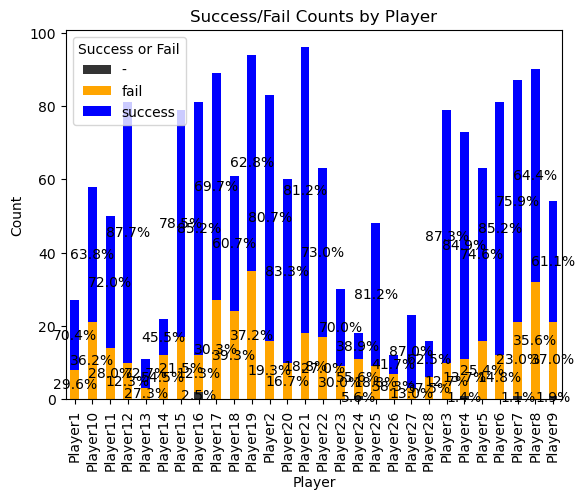

In [302]:
# Define a colorblind-friendly color palette for success and fail
category_colors = {'success': 'blue', 'fail': 'orange'}  # Adjust as needed

# Pivot the DataFrame
pivot_df = player_success_df.pivot(index='Player', columns='Success or Fail', values='Count')

# Calculate the percentages
percent_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Plot with colorblind-friendly colors
ax = pivot_df.plot(kind='bar', stacked=True, color=[category_colors.get(x, '#333333') for x in pivot_df.columns])

plt.xlabel('Player')
plt.ylabel('Count')
plt.title('Success/Fail Counts by Player')

# Annotate with percentages
for i, (team, row) in enumerate(pivot_df.iterrows()):
    for j, (category, count) in enumerate(row.items()):
        percentage = percent_df.loc[team, category]
        if count > 0:  # To avoid displaying 0% on empty bars
            y_offset = pivot_df.loc[team, :].iloc[:j].sum() + count / 2
            ax.annotate(f'{percentage:.1f}%', 
                        xy=(i, y_offset),
                        xytext=(0, 0),  # Offset
                        textcoords="offset points",
                        ha='center', va='center')

plt.show()

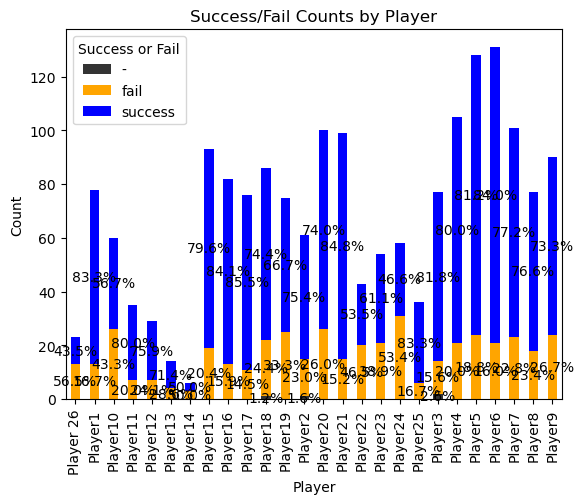

In [301]:
# Define a colorblind-friendly color palette for success and fail
category_colors = {'success': 'blue', 'fail': 'orange'}  # Adjust as needed

# Pivot the DataFrame
pivot_df = player_success_df2.pivot(index='Player', columns='Success or Fail', values='Count')

# Calculate the percentages
percent_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Plot with colorblind-friendly colors
ax = pivot_df.plot(kind='bar', stacked=True, color=[category_colors.get(x, '#333333') for x in pivot_df.columns])

plt.xlabel('Player')
plt.ylabel('Count')
plt.title('Success/Fail Counts by Player')

# Annotate with percentages
for i, (team, row) in enumerate(pivot_df.iterrows()):
    for j, (category, count) in enumerate(row.items()):
        percentage = percent_df.loc[team, category]
        if count > 0:  # To avoid displaying 0% on empty bars
            y_offset = pivot_df.loc[team, :].iloc[:j].sum() + count / 2
            ax.annotate(f'{percentage:.1f}%', 
                        xy=(i, y_offset),
                        xytext=(0, 0),  # Offset
                        textcoords="offset points",
                        ha='center', va='center')

plt.show()

In [265]:
Team_success_df = sample_game_1_events.groupby(by= ['Team','Sucess or Fail'])[['Sucess or Fail']].count()
Team_success_df.index.names = ['Team','s/f']
Team_success_df.reset_index(inplace=True)
Team_success_df.columns = ['Team','Success or Fail','Count']

In [266]:
Team_success_df2 = sample_game_2_events.groupby(by= ['Team','Sucess or Fail'])[['Sucess or Fail']].count()
Team_success_df2.index.names = ['Team','s/f']
Team_success_df2.reset_index(inplace=True)
Team_success_df2.columns = ['Team','Success or Fail','Count']

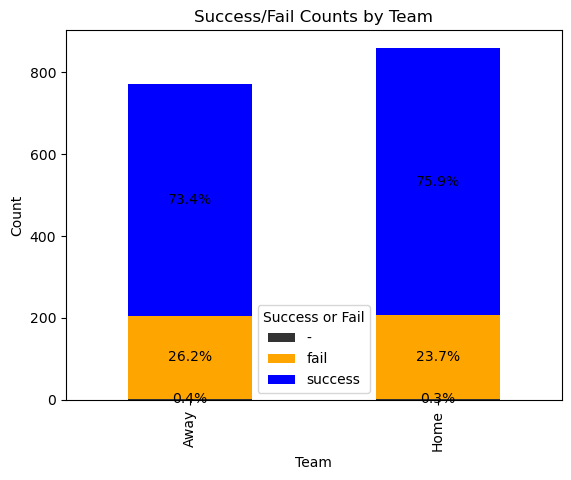

In [298]:

# Define a colorblind-friendly color palette for success and fail
category_colors = {'success': 'blue', 'fail': 'orange'}  # Adjust as needed

# Pivot the DataFrame
pivot_df = Team_success_df.pivot(index='Team', columns='Success or Fail', values='Count')

# Calculate the percentages
percent_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Plot with colorblind-friendly colors
ax = pivot_df.plot(kind='bar', stacked=True, color=[category_colors.get(x, '#333333') for x in pivot_df.columns])

plt.xlabel('Team')
plt.ylabel('Count')
plt.title('Success/Fail Counts by Team')

# Annotate with percentages
for i, (team, row) in enumerate(pivot_df.iterrows()):
    for j, (category, count) in enumerate(row.items()):
        percentage = percent_df.loc[team, category]
        if count > 0:  # To avoid displaying 0% on empty bars
            y_offset = pivot_df.loc[team, :].iloc[:j].sum() + count / 2
            ax.annotate(f'{percentage:.1f}%', 
                        xy=(i, y_offset),
                        xytext=(0, 0),  # Offset
                        textcoords="offset points",
                        ha='center', va='center')

plt.show()


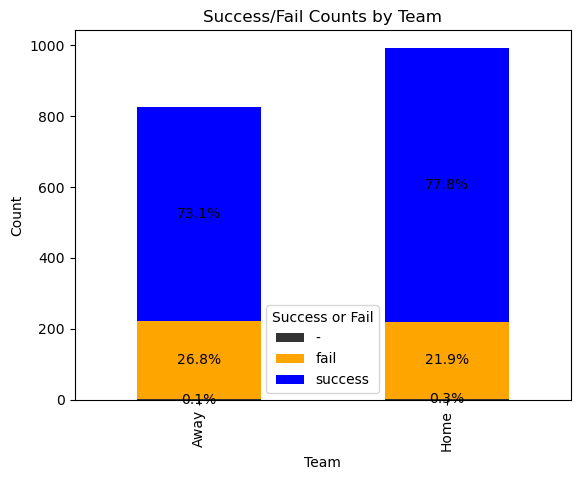

In [299]:

category_colors = {'success': 'blue', 'fail': 'orange'}  # Adjust as needed

# Pivot the DataFrame
pivot_df = Team_success_df2.pivot(index='Team', columns='Success or Fail', values='Count')

# Calculate the percentages
percent_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Plot with colorblind-friendly colors
ax = pivot_df.plot(kind='bar', stacked=True, color=[category_colors.get(x, '#333333') for x in pivot_df.columns])

plt.xlabel('Team')
plt.ylabel('Count')
plt.title('Success/Fail Counts by Team')

# Annotate with percentages
for i, (team, row) in enumerate(pivot_df.iterrows()):
    for j, (category, count) in enumerate(row.items()):
        percentage = percent_df.loc[team, category]
        if count > 0:  # To avoid displaying 0% on empty bars
            y_offset = pivot_df.loc[team, :].iloc[:j].sum() + count / 2
            ax.annotate(f'{percentage:.1f}%', 
                        xy=(i, y_offset),
                        xytext=(0, 0),  # Offset
                        textcoords="offset points",
                        ha='center', va='center')

plt.show()

In [269]:
player_success_time_df = sample_game_1_events.groupby(by= ['From','Team','Sucess or Fail','End Time [s]'])[['Sucess or Fail']].count()
player_success_time_df.index.names = ['Player','Team','d/f','time']
player_success_time_df.reset_index(inplace=True)
player_success_time_df.columns = ['Player','Team','Success or Fail','Time','Count']
player_success_time_df['Time']= player_success_time_df['Time']/6000
player_success_time_df

,Player,Team,Success or Fail,Time,Count
0,Player1,Home,fail,0.031193,1
1,Player1,Home,fail,0.034853,1
2,Player1,Home,fail,0.035893,1
3,Player1,Home,fail,0.091340,1
4,Player1,Home,fail,0.137807,1
...,...,...,...,...,...
1542,Player9,Home,success,0.825547,1
1543,Player9,Home,success,0.838627,2
1544,Player9,Home,success,0.839033,1
1545,Player9,Home,success,0.872053,1


In [270]:
player_success_time_df2 = sample_game_2_events.groupby(by= ['From','Team','Sucess or Fail','End Time [s]'])[['Sucess or Fail']].count()
player_success_time_df2.index.names = ['Player','Team','d/f','time']
player_success_time_df2.reset_index(inplace=True)
player_success_time_df2.columns = ['Player','Team','Success or Fail','Time','Count']
player_success_time_df2['Time']= player_success_time_df2['Time']/6000
player_success_time_df2

,Player,Team,Success or Fail,Time,Count
0,Player 26,Away,fail,0.650240,1
1,Player 26,Away,fail,0.681487,1
2,Player 26,Away,fail,0.682513,2
3,Player 26,Away,fail,0.682827,1
4,Player 26,Away,fail,0.730353,1
...,...,...,...,...,...
1705,Player9,Home,success,0.828907,1
1706,Player9,Home,success,0.849907,1
1707,Player9,Home,success,0.850813,1
1708,Player9,Home,success,0.853453,1


In [271]:
bins = [i/10 for i in range(11)]  # [0, 0.1, 0.2, ..., 1.0]
bin_labels = [f'{int(i*100)}-{int(i*100)+10}' for i in bins[:-1]]
player_success_time_df['Time Bin'] = pd.cut(player_success_time_df['Time'],bins,
                                           labels=bin_labels)
aggregated_bins = player_success_time_df.groupby(['Player', 'Team', 'Success or Fail', 'Time Bin']).sum()
aggregated_bins = aggregated_bins.reset_index()

player_success_time_df

,Player,Team,Success or Fail,Time,Count,Time Bin
0,Player1,Home,fail,0.031193,1,0-10
1,Player1,Home,fail,0.034853,1,0-10
2,Player1,Home,fail,0.035893,1,0-10
3,Player1,Home,fail,0.091340,1,0-10
4,Player1,Home,fail,0.137807,1,10-20
...,...,...,...,...,...,...
1542,Player9,Home,success,0.825547,1,80-90
1543,Player9,Home,success,0.838627,2,80-90
1544,Player9,Home,success,0.839033,1,80-90
1545,Player9,Home,success,0.872053,1,80-90


In [272]:
bins = [i/10 for i in range(11)]  # [0, 0.1, 0.2, ..., 1.0]
bin_labels = [f'{int(i*100)}-{int(i*100)+10}' for i in bins[:-1]]
player_success_time_df2['Time Bin'] = pd.cut(player_success_time_df2['Time'],bins,
                                           labels=bin_labels)
aggregated_bins2 = player_success_time_df2.groupby(['Player', 'Team', 'Success or Fail', 'Time Bin']).sum()
aggregated_bins2 = aggregated_bins2.reset_index()

player_success_time_df2

,Player,Team,Success or Fail,Time,Count,Time Bin
0,Player 26,Away,fail,0.650240,1,60-70
1,Player 26,Away,fail,0.681487,1,60-70
2,Player 26,Away,fail,0.682513,2,60-70
3,Player 26,Away,fail,0.682827,1,60-70
4,Player 26,Away,fail,0.730353,1,70-80
...,...,...,...,...,...,...
1705,Player9,Home,success,0.828907,1,80-90
1706,Player9,Home,success,0.849907,1,80-90
1707,Player9,Home,success,0.850813,1,80-90
1708,Player9,Home,success,0.853453,1,80-90


In [273]:
binned_sf_df_player = aggregated_bins.groupby(by=['Time Bin','Player','Success or Fail'])['Count'].sum()
binned_sf_df_player = pd.DataFrame(binned_sf_df_player)
pivot2_df = binned_sf_df_player.pivot_table(index=["Time Bin","Player"], 
                                      columns='Success or Fail', values='Count', aggfunc='sum')
pivot2_df['Success Rate'] = pivot2_df['success'] /(pivot2_df[['fail','success']].sum(axis=1))

In [274]:
binned_sf_df_player2 = aggregated_bins2.groupby(by=['Time Bin','Player','Success or Fail'])['Count'].sum()
binned_sf_df_player2 = pd.DataFrame(binned_sf_df_player2)
pivotb_df = binned_sf_df_player2.pivot_table(index=["Time Bin","Player"], 
                                      columns='Success or Fail', values='Count', aggfunc='sum')
pivotb_df['Success Rate'] = pivotb_df['success'] /(pivotb_df[['fail','success']].sum(axis=1))

In [277]:
binned_sf_df_team = aggregated_bins.groupby(by=['Time Bin','Team','Success or Fail'])['Count'].sum()
binned_sf_df_team = pd.DataFrame(binned_sf_df_team)
pivot2_df = binned_sf_df_team.pivot_table(index=["Time Bin","Team"], 
                                      columns='Success or Fail', values='Count', aggfunc='sum')
pivot2_df['Success Rate'] = pivot2_df['success'] /(pivot2_df[['fail','success']].sum(axis=1))
pivot2_df

Success or Fail  -  fail  success  Success Rate
Time Bin Team                                  
0-10     Away    0    28       70      0.714286
         Home    0    24       54      0.692308
10-20    Away    0    24       86      0.781818
         Home    0    27       61      0.693182
20-30    Away    1    18       53      0.746479
         Home    1    24       45      0.652174
30-40    Away    1    21       42      0.666667
         Home    1    21       88      0.807339
40-50    Away    1    23       71      0.755319
         Home    1    20       57      0.740260
50-60    Away    0    13       49      0.790323
         Home    0    16       85      0.841584
60-70    Away    0    23       55      0.705128
         Home    0    18       53      0.746479
70-80    Away    0    22       53      0.706667
         Home    0    19       93      0.830357
80-90    Away    0    21       59      0.737500
         Home    0    24       78      0.764706
90-100   Away    0     9       27      0.750000
         Home    0    11       38      0.775510

In [278]:
binned_sf_df_team2 = aggregated_bins2.groupby(by=['Time Bin','Team','Success or Fail'])['Count'].sum()
binned_sf_df_team2 = pd.DataFrame(binned_sf_df_team2)
pivotb_df = binned_sf_df_team2.pivot_table(index=["Time Bin","Team"], 
                                      columns='Success or Fail', values='Count', aggfunc='sum')
pivotb_df['Success Rate'] = pivotb_df['success'] /(pivotb_df[['fail','success']].sum(axis=1))
pivotb_df

Success or Fail  -  fail  success  Success Rate
Time Bin Team                                  
0-10     Away    0    20       60      0.750000
         Home    0    21      103      0.830645
10-20    Away    0    27      101      0.789062
         Home    0    25       93      0.788136
20-30    Away    0    23       69      0.750000
         Home    1    26       55      0.679012
30-40    Away    0    19       73      0.793478
         Home    2    24      113      0.824818
40-50    Away    0    26       75      0.742574
         Home    0    29       69      0.704082
50-60    Away    0    21       56      0.727273
         Home    0    28       94      0.770492
60-70    Away    0    33       59      0.641304
         Home    0    31      121      0.796053
70-80    Away    1    19       29      0.604167
         Home    0    14       37      0.725490
80-90    Away    0    25       62      0.712644
         Home    0    13       69      0.841463
90-100   Away    0     8       19      0.703704
         Home    0     6       18      0.750000

In [281]:
sample_game_1_events.loc[sample_game_1_events['Subtype'].isin(['ON TARGET-GOAL', 
                                                               'HEAD-ON TARGET-GOAL'])]


,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,count,Type Success/Fail,sub Success/Fail,Sucess or Fail
34,Home,SHOT,HEAD-ON TARGET-GOAL,1,2289,91.56,2309,92.36,Player9,NaN,0.92,0.47,1.01,0.55,24,-,success,success
1114,Home,SHOT,ON TARGET-GOAL,2,90005,3600.20,90026,3601.04,Player10,NaN,0.08,0.31,0.00,0.54,24,-,success,success
1213,Home,SHOT,ON TARGET-GOAL,2,99032,3961.28,99046,3961.84,Player9,NaN,0.02,0.54,-0.01,0.51,24,-,success,success


In [282]:
sample_game_2_events.loc[sample_game_2_events['Subtype'].isin(['ON TARGET-GOAL', 
                                                               'HEAD-ON TARGET-GOAL'])]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,count,Type Success/Fail,sub Success/Fail,Sucess or Fail
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,0.05,0.55,-0.01,0.53,24,-,success,success
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,0.92,0.46,1.01,0.48,24,-,success,success
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,0.95,0.52,1.01,0.53,24,-,success,success
1671,Away,SHOT,ON TARGET-GOAL,2,115009,4600.36,115024,4600.96,Player20,NaN,0.12,0.52,-0.02,0.54,24,-,success,success
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,0.79,0.58,1.01,0.54,24,-,success,success


In [283]:
sample_game_1_events.loc[sample_game_1_events['Subtype'].isin(['ON TARGET-GOAL', 
                                                               'HEAD-ON TARGET-GOAL'])].groupby(by="Team").count()

,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,count,Type Success/Fail,sub Success/Fail,Sucess or Fail
Team,,,,,,,,,,,,,,,,,
Home,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3,3,3


In [284]:
sample_game_2_events.loc[sample_game_2_events['Subtype'].isin(['ON TARGET-GOAL', 
                                                               'HEAD-ON TARGET-GOAL'])].groupby(by="Team").count()

,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,count,Type Success/Fail,sub Success/Fail,Sucess or Fail
Team,,,,,,,,,,,,,,,,,
Away,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2
Home,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3,3,3


In [285]:
goal_df = sample_game_1_events.loc[sample_game_1_events['Subtype'].isin(['ON TARGET-GOAL', 
                                                               'HEAD-ON TARGET-GOAL'])][['Team','End Time [s]']]
goal_df['Time Bin'] =goal_df['End Time [s]']/6000
goal_df

,Team,End Time [s],Time Bin
34,Home,92.36,0.015393
1114,Home,3601.04,0.600173
1213,Home,3961.84,0.660307


In [286]:
goal_df2 = sample_game_2_events.loc[sample_game_2_events['Subtype'].isin(['ON TARGET-GOAL', 
                                                               'HEAD-ON TARGET-GOAL'])][['Team','End Time [s]']]
goal_df2['Time Bin'] =goal_df['End Time [s]']/6000
goal_df2

,Team,End Time [s],Time Bin
198,Home,488.48,NaN
823,Away,2123.00,NaN
1118,Home,2959.80,NaN
1671,Away,4600.96,NaN
1723,Home,4842.20,NaN


In [288]:
goal_df['Time'] = goal_df['End Time [s]']/6000
bins = [i/10 for i in range(11)]  # [0, 0.1, 0.2, ..., 1.0]
bin_labels = [f'{int(i*100)}-{int(i*100)+10}' for i in bins[:-1]]
goal_df['Time Bin'] = pd.cut(goal_df['Time'],bins,
                                           labels=bin_labels)
goal_df

,Team,End Time [s],Time Bin,Time
34,Home,92.36,0-10,0.015393
1114,Home,3601.04,60-70,0.600173
1213,Home,3961.84,60-70,0.660307


In [289]:
goal_df2['Time'] = goal_df2['End Time [s]']/6000
bins = [i/10 for i in range(11)]  # [0, 0.1, 0.2, ..., 1.0]
bin_labels = [f'{int(i*100)}-{int(i*100)+10}' for i in bins[:-1]]
goal_df2['Time Bin'] = pd.cut(goal_df2['Time'],bins,
                                           labels=bin_labels)
goal_df2

,Team,End Time [s],Time Bin,Time
198,Home,488.48,0-10,0.081413
823,Away,2123.00,30-40,0.353833
1118,Home,2959.80,40-50,0.493300
1671,Away,4600.96,70-80,0.766827
1723,Home,4842.20,80-90,0.807033


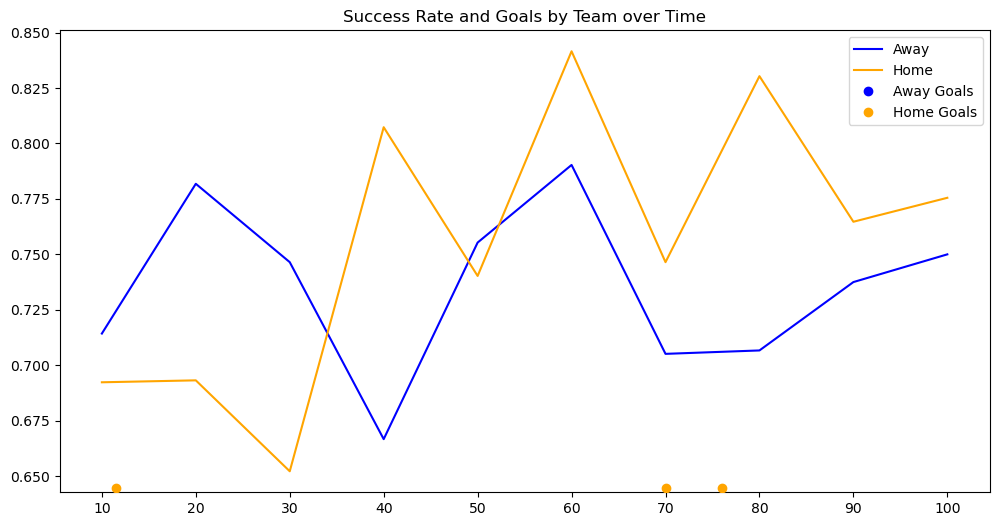

In [296]:

df_reset = pivot2_df.reset_index()
# Assuming df_reset is your DataFrame for success rates
# And goal_df is your DataFrame for goals

# Get unique teams and time bins
teams = df_reset['Team'].unique()
time_bins = df_reset['Time Bin'].unique()

# Define a colorblind-friendly color palette
# Colors: blue, orange, green, red (distinguishable by colorblind individuals)
team_colors = ['blue', 'orange', 'green', 'red']  # Expand or modify as needed
team_color_dict = dict(zip(teams, team_colors))

# Create a mapping from time bins to indices
time_bin_indices = {time_bin: i for i, time_bin in enumerate(time_bins)}

# Extract the upper range of each time bin for x-axis labels
upper_range_labels = [time_bin.split('-')[1] for time_bin in time_bins]

# Plotting success rates
plt.figure(figsize=(12, 6))
legend_handles = []  # List to hold legend handles
for team in teams:
    team_data = df_reset[df_reset['Team'] == team]
    color = team_color_dict.get(team, 'black')  # Default to black if no color assigned
    line, = plt.plot(team_data['Time Bin'], team_data['Success Rate'], label=team, color=color)
    legend_handles.append(mlines.Line2D([], [], color=color, label=team))

# Create a secondary axis to plot the goals
ax2 = plt.twinx()
ax2.set_ylim(0, 1)  # Set the limits to keep the axis invisible
ax2.axis('off')  # Turn off the secondary axis

# Plotting goals for each team on the secondary axis
for team in teams:
    team_goals = goal_df[goal_df['Team'] == team]
    goal_color = team_color_dict.get(team, 'black')  # Default to black if no color assigned
    for _, goal in team_goals.iterrows():
        exact_time = goal['Time']
        time_bin = goal['Time Bin']
        bin_start = int(time_bin.split('-')[0])
        position = (exact_time - bin_start / 100.0) * 10 + time_bin_indices[time_bin]
        ax2.plot(position, 0.01, 'o', color=goal_color)  # Plotting goal marker slightly above y=0

    # Add custom legend entry for each team's goals
    goal_handle = mlines.Line2D([], [], color=goal_color, marker='o', linestyle='None', label=f'{team} Goals')
    legend_handles.append(goal_handle)

plt.xlabel('Time Bin')
plt.ylabel('Success Rate')
plt.title('Success Rate and Goals by Team over Time')
plt.xticks(range(len(time_bins)), upper_range_labels, rotation=45)

# Create the legend with the custom handles
plt.legend(handles=legend_handles)
plt.show()




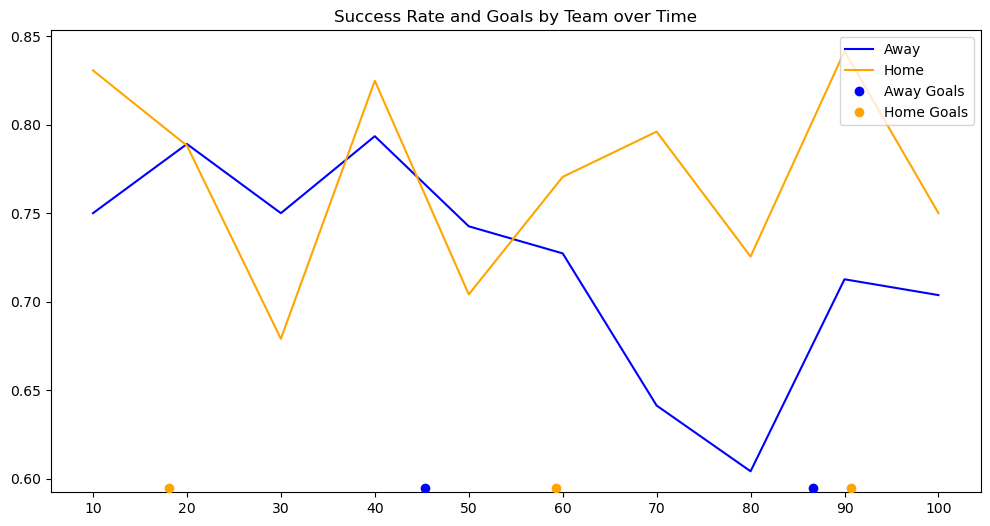

In [294]:


df_reset = pivotb_df.reset_index()

# Assuming df_reset is your DataFrame for success rates
# And goal_df is your DataFrame for goals

# Get unique teams and time bins
teams = df_reset['Team'].unique()
time_bins = df_reset['Time Bin'].unique()

# Define a colorblind-friendly color palette
# Colors: blue, orange, green, red (distinguishable by colorblind individuals)
team_colors = ['blue', 'orange', 'green', 'red']  # Expand or modify as needed
team_color_dict = dict(zip(teams, team_colors))

# Create a mapping from time bins to indices
time_bin_indices = {time_bin: i for i, time_bin in enumerate(time_bins)}

# Extract the upper range of each time bin for x-axis labels
upper_range_labels = [time_bin.split('-')[1] for time_bin in time_bins]

# Plotting success rates
plt.figure(figsize=(12, 6))
legend_handles = []  # List to hold legend handles
for team in teams:
    team_data = df_reset[df_reset['Team'] == team]
    color = team_color_dict.get(team, 'black')  # Default to black if no color assigned
    line, = plt.plot(team_data['Time Bin'], team_data['Success Rate'], label=team, color=color)
    legend_handles.append(mlines.Line2D([], [], color=color, label=team))

# Create a secondary axis to plot the goals
ax2 = plt.twinx()
ax2.set_ylim(0, 1)  # Set the limits to keep the axis invisible
ax2.axis('off')  # Turn off the secondary axis

# Plotting goals for each team on the secondary axis
for team in teams:
    team_goals = goal_df2[goal_df2['Team'] == team]
    goal_color = team_color_dict.get(team, 'black')  # Default to black if no color assigned
    for _, goal in team_goals.iterrows():
        exact_time = goal['Time']
        time_bin = goal['Time Bin']
        bin_start = int(time_bin.split('-')[0])
        position = (exact_time - bin_start / 100.0) * 10 + time_bin_indices[time_bin]
        ax2.plot(position, 0.01, 'o', color=goal_color)  # Plotting goal marker slightly above y=0

    # Add custom legend entry for each team's goals
    goal_handle = mlines.Line2D([], [], color=goal_color, marker='o', linestyle='None', label=f'{team} Goals')
    legend_handles.append(goal_handle)

plt.xlabel('Time Bin')
plt.ylabel('Success Rate')
plt.title('Success Rate and Goals by Team over Time')
plt.xticks(range(len(time_bins)), upper_range_labels, rotation=45)

# Create the legend with the custom handles
plt.legend(handles=legend_handles)
plt.show()
